In [926]:
import os
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [927]:
def gen_h_vals(threshold, scores):
    n = scores.shape[0]
    h_vals = np.zeros((n))
    for i in range(n):
        if scores[i]>threshold:
            h_vals[i] = 1
    return h_vals

In [967]:
n = 1000
threshold = 3
stand_norm = np.random.normal(0,1,size = (n,))
h_vals = gen_h_vals(threshold, stand_norm)
for i in range(n):
    if stand_norm[i]>threshold:
        h_vals[i] = 1

In [968]:
mu_no_is = np.mean(h_vals)
var_no_is = np.mean(h_vals**2) - mu_no_is**2
mu_no_is, var_no_is

(0.002, 0.001996)

In [969]:
new_norm = np.random.normal(4,1,size = (n,))
n = 1000
threshold = 3
f_vals = norm.pdf(new_norm, 0, 1)
g_vals = norm.pdf(new_norm, 4, 1)
h_vals = gen_h_vals(threshold, new_norm)
        
mu_is = np.mean((h_vals*f_vals)/g_vals)
var_is = np.mean(((h_vals*f_vals)/g_vals)**2) - mu_is**2
mu_is, var_is

(0.0012559419383181615, 8.639811297773685e-06)

/Users/alexderhacobian/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(0.01524, 0.0150077424)

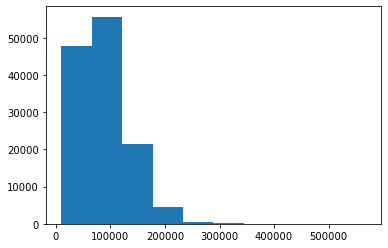

In [919]:
salaries_df = pd.read_csv('salaries.csv')
vald_thresh = 10000
salaries_df = salaries_df[salaries_df['TotalPay'] > vald_thresh]
salaries_df = salaries_df.reindex(columns = ['TotalPay'])



pay = np.asarray(salaries_df['TotalPay'])
plt.hist(pay)
total_num = len(pay)
num_samples = 50000
ppl = np.random.randint(0,total_num, num_samples)
samples = pay[ppl]
#samples = pay[ppl]
threshold = 200000
#NAIVE METHOD
h_vals = gen_h_vals(threshold, samples)
mu_no_is = np.mean(h_vals)
var_no_is = np.mean(h_vals**2) - mu_no_is**2
mu_no_is, var_no_is

In [628]:
#IMPORTANCE SAMPLING
f_vals = norm.pdf(new_norm, 0, 1)
g_vals = norm.pdf(new_norm, 4, 1)
h_vals = np.zeros((n))

In [790]:
def generate_pdf(salaries, per_bin):
    valid_thresh = 1000
    buffer = 5
    salaries = np.sort(salaries)
    groups = [tuple([i, i + per_bin]) for i in range(valid_thresh, int(salaries[-1])+buffer, per_bin)]
    
    probs = {}
    for group in groups:
        probs[group] = len(np.where(np.logical_and(salaries>=group[0], salaries<group[1]))[0])/len(salaries)
    return groups, probs

In [912]:
per_bin = 100
groups, p_vals = generate_pdf(samples, per_bin)

In [913]:
def pdf(val, groups, probs):
    for group in groups:
        if (val<group[1] and val>=group[0]):
            return probs[group]

In [924]:
samples = np.sort(pay[ppl])
f_vals = [pdf(val, groups, p_vals) for val in np.sort(samples)]
mean = 400000
num_samples = 1000
threshhold = 200000
new_norm = np.random.normal(300000, 1000, size=(num_samples))
g_vals = norm.pdf(new_norm, 300000, 1000)
f_vals = [pdf(val, groups, p_vals) for val in new_norm]
print(np.sum(f_vals))
h_vals = gen_h_vals(threshhold, new_norm)
mu_im = np.mean((h_vals*f_vals)/g_vals, axis=0)
var_im = np.mean(((h_vals*f_vals)/g_vals)**2, axis=0) - mu_im**2
mu_im, var_im

0.0021000000000000003


(0.01172814156243778, 0.004867321593145151)